In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.plots import Plots
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

In [2]:
n_iters=5000
n_episodes=2000000
gamma=0.99
figsize=(5, 5)

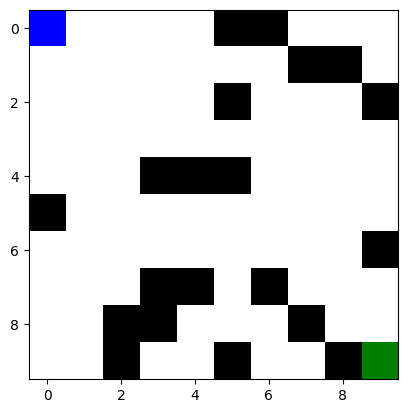

In [3]:
# make gym environment 
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=10), is_slippery=True)

# plot color mapping
color_map = {'S': 'blue', 'F': 'white', 'H': 'black', 'G': 'green'}

# Example 2D list with color values
data = frozen_lake.spec.kwargs['desc']

# Create a plot
plt.imshow([[plt.cm.colors.to_rgba(color_map[color]) for color in row] for row in data])
plt.show()

runtime = 0.76 seconds


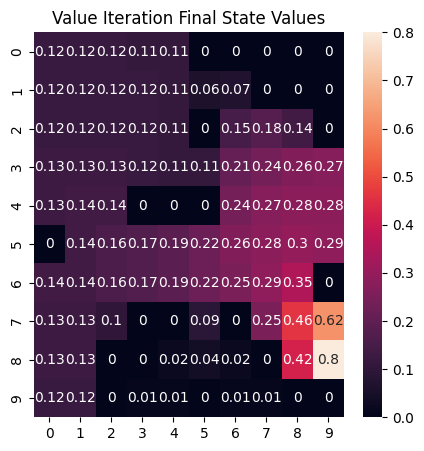

In [55]:
num_rows = len(data)  # Assuming its a square grid

# run VI
V_vi, V_track_vi, pi_vi = Planner(frozen_lake.P).value_iteration(n_iters=n_iters, gamma=gamma)

#plot state values
size=(num_rows, num_rows)
plt.figure(figsize=figsize)
Plots.values_heat_map(V_vi, "Value Iteration Final State Values", size)

runtime = 0.99 seconds


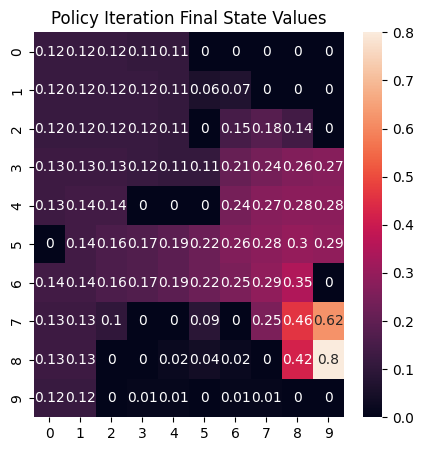

In [56]:
num_rows = len(data)  # Assuming its a square grid

# run PI
V_pi, V_track_pi, pi_pi = Planner(frozen_lake.P).policy_iteration(n_iters=n_iters, gamma=gamma)

#plot state values
size=(num_rows, num_rows)
plt.figure(figsize=figsize)
Plots.values_heat_map(V_pi, "Policy Iteration Final State Values", size)

  0%|          | 0/2000000 [00:00<?, ?it/s]/home/jack/data/omscs/7641 - ml/venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/jack/data/omscs/7641 - ml/venv/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 2129.19 seconds


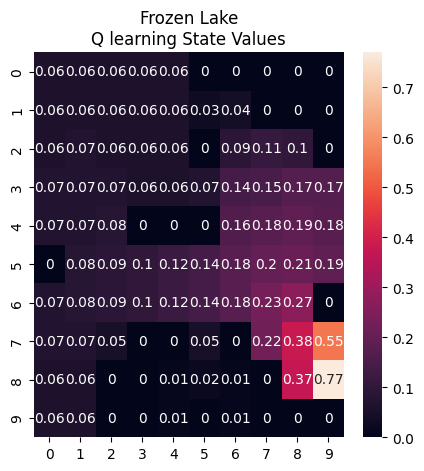

In [6]:
num_rows = len(data)  # Assuming its a square grid

# run RL
Q_q, V_q, pi_q, Q_track_q, pi_track_q = RL(frozen_lake).q_learning(n_episodes=n_episodes, gamma=gamma)

#plot state values
plot = np.zeros((num_rows, num_rows))
for i in range(len(V_q)):
    plot[i//10][i%10] = V_q[i]
size=(num_rows, num_rows)
plt.figure(figsize=figsize)
Plots.values_heat_map(plot, "Q learning Final State Values", size)

In [10]:
def similarity(y1, y2):
    if len(y1) != len(y2):
        return -1
    total = len(y1)
    same = 0
    for i in range(total):
        if y1[i] == y2[i]:
            same += 1
    return same / total

pi_vi_arr = [v for _, v in pi_vi.items()]
pi_pi_arr = [v for _, v in pi_pi.items()]
pi_q_arr = [v for _, v in pi_q.items()]
print(similarity(pi_vi_arr, pi_pi_arr))
print(similarity(pi_vi_arr, pi_q_arr))

1.0
0.85


In [43]:
def get_max_iters(v_track):
    for i in range(1, len(v_track)):
        value_sum = v_track[i].sum()
        if value_sum == 0:
            break
    return i-1
    
print(get_max_iters(V_track_vi))
print(get_max_iters(V_track_pi))

975
14


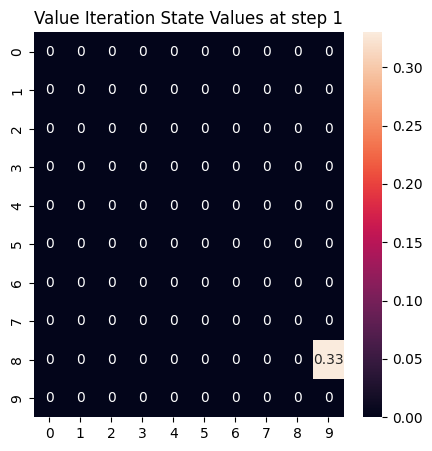

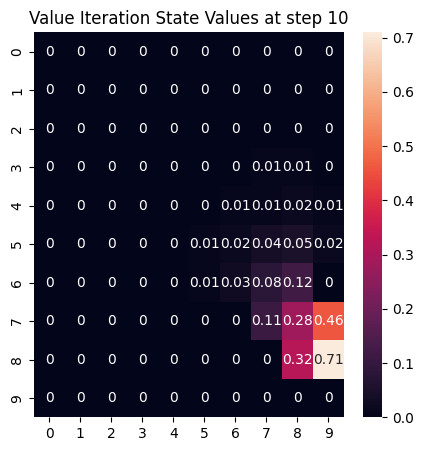

In [51]:
plot_i = [1, 10]

for i in plot_i:
    size=(num_rows, num_rows)
    plt.figure(figsize=figsize)
    Plots.values_heat_map(V_track_vi[i], f"Value Iteration State Values at step {i}", size)

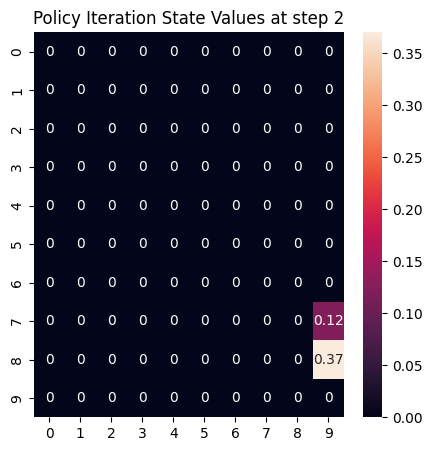

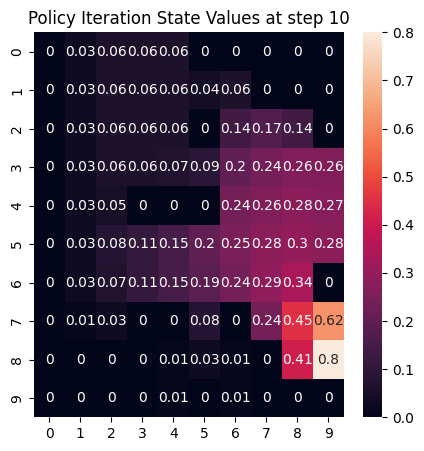

In [58]:
plot_i = [2, 10]

for i in plot_i:
    size=(num_rows, num_rows)
    plt.figure(figsize=figsize)
    Plots.values_heat_map(V_track_pi[i], f"Policy Iteration State Values at step {i}", size)

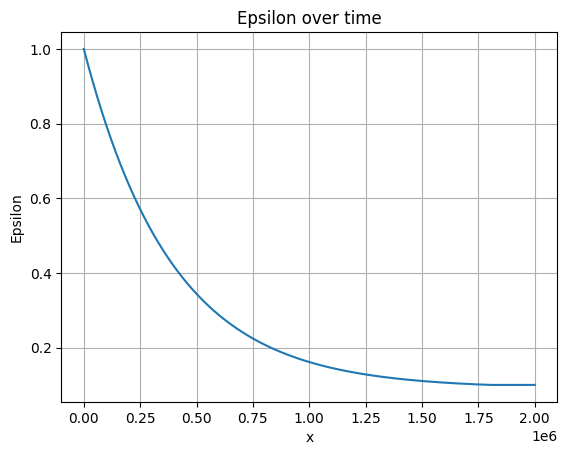

In [62]:
y = RL.decay_schedule(1.0, 0.1, 0.9, n_episodes)
plt.plot(range(len(y)), y)
plt.title("Epsilon over time")
plt.xlabel("x")
plt.ylabel("Epsilon")
plt.grid(True)
plt.show()